<a href="https://colab.research.google.com/github/antonellafontanetto/DataScience-Entregas/blob/main/Notebook_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
import sklearn

In [4]:
# Chequeamos nuestra version
sklearn.__version__

'1.6.1'

Ya dijimos previamente que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En la clase anterior, hicimos el analisis exploratorio de los datos y pudimos observar el tipo de datos que teniamos. Pudimos hacernos preguntas y ver algunos patrones.

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [5]:
# Leemos nuevamente los datos del blackfriday
blackfriday = pd.read_csv('/content/blackfriday.csv')

In [6]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0


#### MANEJO DE DATOS FALTANTES 🚨

Primero, vamos a recordar si tenemos datos faltantes.

In [7]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,53758
Age,26879
Occupation,80637
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,166986


¿Cuanto representa esos valores faltantes?

**¿Que debo preguntarme al manejar datos faltantes?**

- ¿Quiero conservar la información?
- ¿Qué tipo de datos tengo en la columna que voy a imputar?
- ¿Por qué puede ser que tengo los valores faltantes?:
    - Valores faltantes al azar
    - Valores faltantes no al azar
- Si es una variable numerica continua, ¿Que distribución tiene?

**¿Como decido que hago con los valores faltantes?**

- Entender que no hay una manera _perfecta_ de manejar los valores faltantes.

- Depende de mis datos

- Observar no solo la cantidad de datos faltantes sino también su patrón.

- Estrategias:  
     - **Eliminar los valores**:
        - Si la recogida de datos no se ha realizado de forma aleatoria introduce sesgo.  
        - En el caso de que haya mucho patrones con datos faltantes, podría reducir considerablemente la cantidad de filas disponibles.
     - **Eliminación de la variable (columna)**:
         - Las variables “descartadas” podrían contener información de vital importancia.      
     - **Imputar los valores**:
        - Sustituir por media o mediana: Solo en variables numericas  
        - Sustituir por valor mas frecuente: Util para variables categoricas
        - Algoritmo de ML: K-NN (k-nearest neighboors)

A) Si optamos por eliminar los datos, puedemos hacerlo usando la siguiente función:
    
`.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)`

- **axis**: {0, 1}, default 0. 0: Filas, 1: Columnas
- **how**: {'any', 'all'}, default 'any'. Any: Si hay un valor faltante elimina la columna o fila. All: Si todos los valores de la fila o columna son faltantes, elimina la fila o columna.
- **subset**: Nombre de filas o columnas donde buscar valores faltantes
- **inplace**: True modifica el DataFrame original

[documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [10]:
blackfriday_drop = blackfriday.dropna() #dropna sirve para eliminar filas o columnas que contienen valores nulos (NaN) en un dataframe

In [9]:
blackfriday_drop.shape

(116955, 12)

In [13]:
blackfriday.dropna(how='all') #how all elimina solo si hay NaN en columnas específicas

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,43.0,16.0,C,1,0,1,2.0,NaN,11664.0
537573,1004737,P00111142,M,37.0,16.0,C,1,0,1,15.0,16.0,19196.0
537574,1004737,P00345942,M,41.0,16.0,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,38.0,16.0,C,1,0,5,NaN,NaN,7172.0


In [14]:
blackfriday.dropna(subset=['Gender']) #elimina las filas del dataframe donde la columna "Gender" esta vacía o tenga NaN

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,28.0,15.0,A,3,0,1,2.0,NaN,15227.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,43.0,16.0,C,1,0,1,2.0,NaN,11664.0
537573,1004737,P00111142,M,37.0,16.0,C,1,0,1,15.0,16.0,19196.0
537574,1004737,P00345942,M,41.0,16.0,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,38.0,16.0,C,1,0,5,NaN,NaN,7172.0


In [15]:
blackfriday.dropna(subset=['Age', 'Gender']) #elimina las filas del dataframe que tengan valores faltantes NaN en al menos una de las columnas Age o Gender

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,28.0,15.0,A,3,0,1,2.0,NaN,15227.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,43.0,16.0,C,1,0,1,2.0,NaN,11664.0
537573,1004737,P00111142,M,37.0,16.0,C,1,0,1,15.0,16.0,19196.0
537574,1004737,P00345942,M,41.0,16.0,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,38.0,16.0,C,1,0,5,NaN,NaN,7172.0


B) Si optamos por imputar los datos, podemos hacerlo usando la siguiente función:
    
`sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, copy=True, add_indicator=False)`
    
- **missing_values**: Indica como son representados los valores faltantes (np.nan es el estandard)
- **strategy**: `mean`, `median`, `most_frequent`, `constant`.
- **fill_value**: Si uso `constant`, puedo usar `fill_value` para indicar por cuál valor debe ser reemplazado
- **copy**: Si pongo True, crea una copia de X
- **add_indicator**: Agrega un indicador para los valores faltantes.


[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [16]:
from sklearn.impute import SimpleImputer

**Variable: `City_Category`**

<ipython-input-17-30b94a7a165c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation", data=blackfriday, palette="Set3")


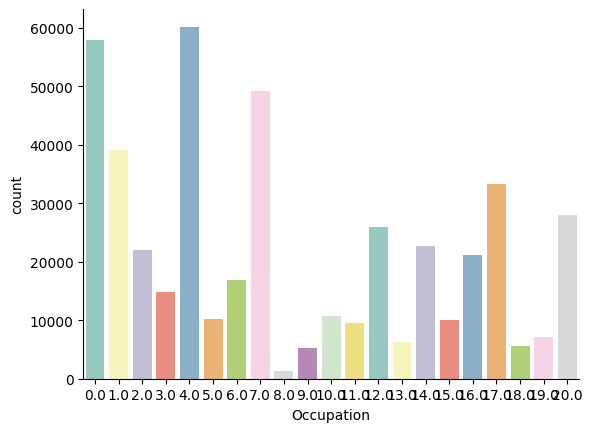

In [17]:
sns.countplot(x="Occupation", data=blackfriday, palette="Set3")
sns.despine()

In [19]:
blackfriday['Occupation'].value_counts()

,count
Occupation,
4.0,60180
0.0,57924
7.0,49151
1.0,39031
17.0,33285
20.0,27948
12.0,25958
14.0,22702
2.0,21927


In [20]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [21]:
blackfriday_imputados = imputer.fit_transform(blackfriday[['Occupation']])

In [22]:
np.shape(blackfriday_imputados)

(537577, 1)

In [23]:
blackfriday_imputados[:10]

array([[10.],
       [ 4.],
       [10.],
       [10.],
       [16.],
       [15.],
       [ 7.],
       [ 7.],
       [ 4.],
       [20.]])

In [24]:
blackfriday["Occupation"] = blackfriday_imputados

In [25]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,4.0,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0


In [26]:
blackfriday['Occupation'].value_counts()

,count
Occupation,
4.0,140817
0.0,57924
7.0,49151
1.0,39031
17.0,33285
20.0,27948
12.0,25958
14.0,22702
2.0,21927


**Variable: `Age`**

In [27]:
blackfriday['Age'].describe()

,Age
count,510698.000000
mean,34.321239
std,11.640546
min,14.000000
25%,26.000000
50%,32.000000
75%,42.000000
max,74.000000


In [28]:
imputer_age = SimpleImputer(missing_values=np.nan, strategy="mean")

In [ ]:
# Convertir la columna 'Age' de string a entero
# Ver el tipo de dato de una columna específica
print(blackfriday['Age'].dtype)

object


In [ ]:
blackfriday['Age'].describe()

,Age
count,550068
unique,7
top,26-35
freq,219587


**Variable: `Gender`**

In [ ]:
blackfriday['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
imputer_gen = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:
blackfriday['Gender'] = imputer_gen.fit_transform(blackfriday[['Gender']]).ravel()

In [ ]:
blackfriday['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


**Variable `Purchase`**

In [ ]:
blackfriday.dropna(subset=['Purchase'], inplace=True)

**Columnas `Product_Category_2` and `Product_Category_3`**

In [ ]:
blackfriday.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [ ]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Purchase,0


#### DETECCION DE OUTLIERS

- Manera de detectar outliers:
    - z-score
        - Considera que todo valor que se aleje mucho de la media=0 es un outlier.
        - Depende de la media y el desvio estandard para medir la centralidad y dispersión, los cuales son muy afectados por outliers. Si las variables no tiene una distribución normal, termino removiendo muchos outliers del dataset.
        - No funciona bien en dataset muy pequeños.
    - Rango Intercuartil:
        - Es robusto y no es tan sensible a outliers.

In [29]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,float64
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


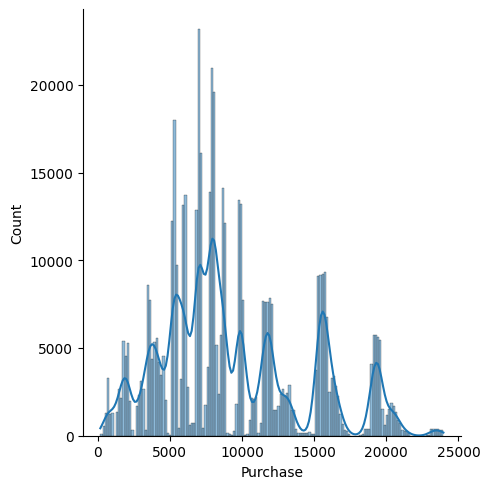

In [44]:
sns.displot(blackfriday['Purchase'], kde=True) #El gráfico muestra la frecuencia de los valores de compra, si hay sesgo, outliers o multiples grupos de compradores.
sns.despine() #kde=True muestra la curva de densidad

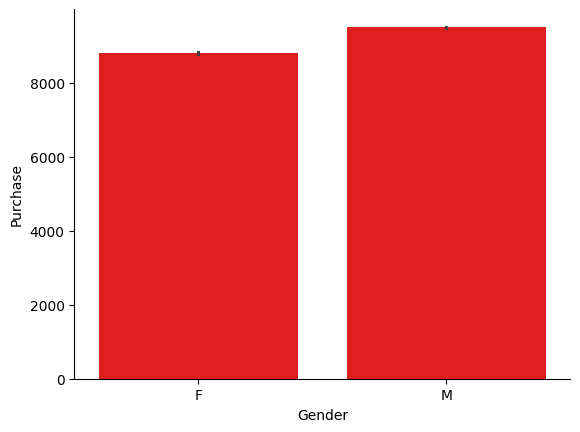

In [45]:
ax = sns.barplot(x='Gender', y='Purchase', data=blackfriday, color='#FF0000')
sns.despine() #despine es quitar los bordes, las espinas

In [46]:
z = stats.zscore(np.array(blackfriday['Purchase'])) #selecciona la columna compras, convierte esa columna en un array NumPy y calcula el Z-score

In [47]:
threshold = 2.0  #"Considero que un valor es un outlier si está a más de 2 desviaciones estándar de la media."

In [48]:
z_index = blackfriday['Purchase'][np.abs(z) < threshold].index

blackfriday_withzscore = blackfriday.loc[z_index]

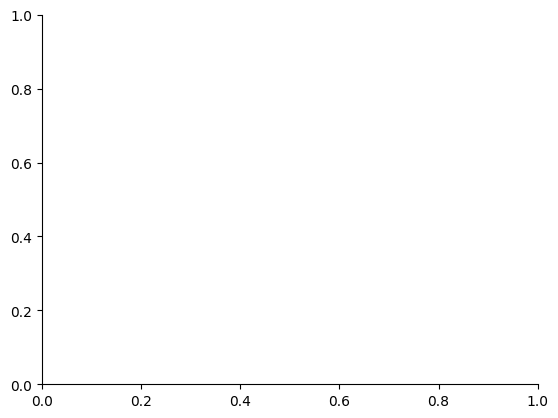

In [49]:
sns.barplot(x='Gender', y='Purchase', data=blackfriday_withzscore, color='#F5B041')
sns.despine()

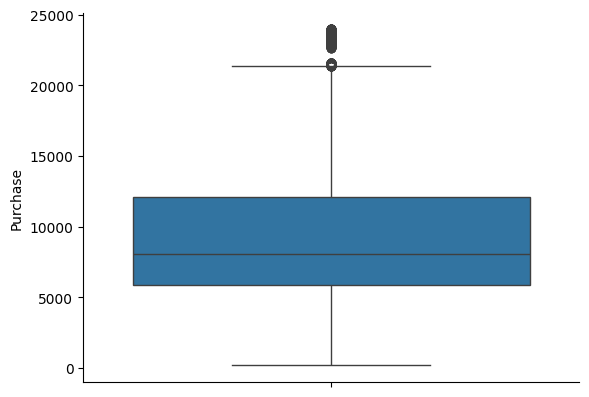

In [50]:
sns.boxplot(blackfriday['Purchase'])
sns.despine()

In [51]:
q1 = blackfriday['Purchase'].quantile(0.25)
q3 = blackfriday['Purchase'].quantile(0.75)

In [52]:
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [53]:
bf = blackfriday[(blackfriday['Purchase'] > lb) & (blackfriday['Purchase'] < ub)]

In [54]:
bf.reset_index(drop=True, inplace=True)

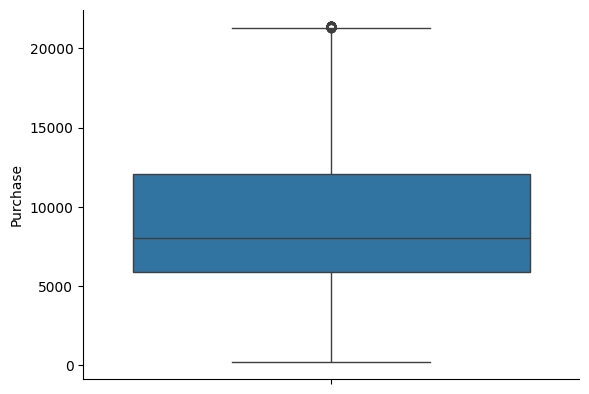

In [55]:
sns.boxplot(bf['Purchase'])
sns.despine()